# Assessing Fit Polynomial Regression

In this notebook we will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular we will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

# Fire up graphlab create

In [24]:
import graphlab
import numpy as np

Next we're going to write a polynomial function that takes an SArray and a maximal degree and returns an SFrame with columns containing the SArray to all the powers up to the maximal degree.

The easiest way to apply a power to an SArray is to use the .apply() and lambda x: functions. 

In [25]:
tmp = graphlab.SArray([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


We can create an empty SFrame using graphlab.SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [3]:
ex_sframe = graphlab.SFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



# Computing the Residual Sum of Squares

In [26]:
def get_residual_sum_of_squares(predictions, outcome): 
    difference_square = (outcome - predictions)**2,
    RSS = np.sum(difference_square)
    return(RSS)

# Polynomial_sframe function

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [27]:
def polynomial_sframe(feature, degree):
    poly_sframe = graphlab.SFrame()
    for power in range(1, degree+1): 
        name = 'power_' + str(power)
        poly_sframe[name] = feature.apply(lambda x : x**power)
    return poly_sframe

In [28]:
print polynomial_sframe(tmp, 3)

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [29]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [30]:
sales = sales.sort(['sqft_living', 'price'])

# Degree 1 polynomial

In [31]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent.

In [32]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.042219     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [33]:
#let's take a look at the weights before we plot
model1.get("coefficients")

name,index,value,stderr
(intercept),None,-43579.0852514,4402.68969743
power_1,None,280.622770886,1.93639855513


# Plotting the data and prediction

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

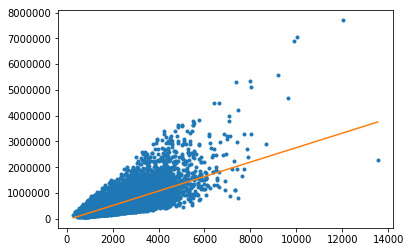

In [38]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')
plt.show()

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.' . The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

## Degree 2 polynomial

In [39]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.067637     | 5913020.984255     | 250948.368758 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [40]:
model2.get("coefficients")

name,index,value,stderr
(intercept),None,199222.496445,7058.00483552
power_1,None,67.9940640677,5.28787201316
power_2,None,0.0385812312789,0.000898246547032


# Plotting the data and prediction

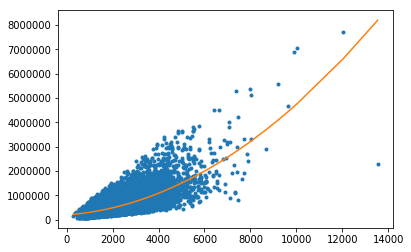

In [50]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')
plt.show()

## Degree 3 polynomial

In [51]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
my_features = poly3_data.column_names()
poly3_data['price'] = sales['price']
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.104078     | 3261066.736007     | 249261.286346 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [52]:
model3.get('coefficients')

name,index,value,stderr
(intercept),None,336788.117952,10661.0153713
power_1,None,-90.1476236119,10.6222891844
power_2,None,0.087036715081,0.00296630623148
power_3,None,-3.8398521196e-06,2.2417490959e-07


# Plotting the data and prediction

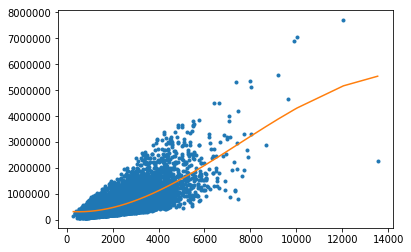

In [55]:
plt.plot(poly3_data['power_1'], poly3_data['price'], '.',
         poly3_data['power_1'], model3.predict(poly3_data), '-')
plt.show()

# Degree 15 polynomial

In [56]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my15_features = poly15_data.column_names()
poly15_data['price'] = sales['price']
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my15_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.119649     | 2662308.584336     | 245690.511190 |

+-----------+----------+--------------+--------------------+---------------+

In [57]:
model15.get('coefficients')

SUCCESS: Optimal solution found.

name,index,value,stderr
(intercept),None,73619.7520905,nan
power_1,None,410.287462578,nan
power_2,None,-0.230450714454,nan
power_3,None,7.58840542484e-05,nan
power_4,None,-5.65701802503e-09,nan
power_5,None,-4.57028131094e-13,nan
power_6,None,2.66360206858e-17,nan
power_7,None,3.38584769353e-21,nan
power_8,None,1.14723103989e-25,nan
power_9,None,-4.65293586695e-30,2.03459783014e-25


# Plotting the data and prediction

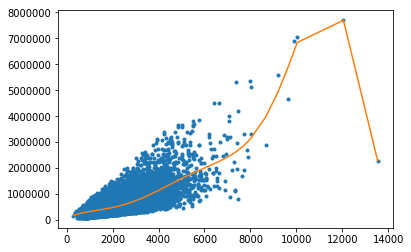

In [58]:
plt.plot(poly15_data['power_1'], poly15_data['price'], '.',
         poly15_data['power_1'], model15.predict(poly15_data), '-')
plt.show()

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then we will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (we should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above).

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
We should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

# Splitting the data into 4 set of equal length

In [59]:
split_1, split_2 = sales.random_split(0.5, seed = 0)

set_1, set_2 = split_1.random_split(0.5, seed = 0)
set_3, set_4 = split_2.random_split(0.5, seed = 0)

# Fitting the model on all the sets

In [62]:
set1_data = polynomial_sframe(set_1['sqft_living'], 15)
my_features = set1_data.column_names()
set1_data['price'] = set_1['price']
model_1 = graphlab.linear_regression.create(set1_data, target = 'price', features = my_features, validation_set = None, verbose = False)

In [67]:
set2_data = polynomial_sframe(set_2['sqft_living'], 15)
my_features = set2_data.column_names()
set2_data['price'] = set_2['price']
model_2 = graphlab.linear_regression.create(set2_data, target = 'price', features = my_features, validation_set = None, verbose = False)

In [68]:
set3_data = polynomial_sframe(set_3['sqft_living'], 15)
my_features = set3_data.column_names()
set3_data['price'] = set_3['price']
model_3 = graphlab.linear_regression.create(set3_data, target = 'price', features = my_features, validation_set = None, verbose = False)

In [69]:
set4_data = polynomial_sframe(set_4['sqft_living'], 15)
my_features = set4_data.column_names()
set4_data['price'] = set_4['price']
model_4 = graphlab.linear_regression.create(set4_data, target = 'price', features = my_features, validation_set = None, verbose = False)

# Checking the coefficents of all models

In [72]:
model_1.get('coefficients').print_rows(num_rows = 16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |    223312.75025    |   857561.820104   |
|   power_1   |  None |   118.086127586    |    3756.8733952   |
|   power_2   |  None |  -0.0473482011337  |   6.84587871011   |
|   power_3   |  None | 3.25310342468e-05  |  0.00685414302435 |
|   power_4   |  None | -3.32372152561e-09 | 4.18843143004e-06 |
|   power_5   |  None | -9.75830457855e-14 | 1.62931789871e-09 |
|   power_6   |  None | 1.15440303451e-17  | 3.99684227432e-13 |
|   power_7   |  None | 1.05145869391e-21  | 5.28328373325e-17 |
|   power_8   |  None | 3.46049616401e-26  |        nan        |
|   power_9   |  None | -1.09654453999e-30 |        nan        |
|   power_10  |  None | -2.42031812101e-34 |        nan        |
|   power_11  |  None | -1.99601206794e-38 |        nan        |
|   power_12  |  None | -

In [73]:
model_2.get('coefficients').print_rows(num_rows = 16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   89836.5077429    |   3566904.11726   |
|   power_1   |  None |    319.80694674    |   22184.8801067   |
|   power_2   |  None |  -0.103315397022   |   57.2291393674   |
|   power_3   |  None | 1.06682476002e-05  |  0.0813858421224  |
|   power_4   |  None | 5.75577097795e-09  | 7.13173875739e-05 |
|   power_5   |  None | -2.54663464687e-13 | 4.05738843439e-08 |
|   power_6   |  None | -1.09641345077e-16 |  1.5265494869e-11 |
|   power_7   |  None | -6.36458441761e-21 | 3.74474558177e-15 |
|   power_8   |  None | 5.52560417013e-25  | 5.57526628289e-19 |
|   power_9   |  None | 1.35082038982e-28  | 3.91842048223e-23 |
|   power_10  |  None | 1.18408188244e-32  | 3.14088000916e-27 |
|   power_11  |  None | 1.98348000675e-37  | 4.31569081625e-31 |
|   power_12  |  None | -

In [74]:
model_3.get('coefficients').print_rows(num_rows = 16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   87317.9795578    |   1928720.86678   |
|   power_1   |  None |   356.304911038    |   9880.13176488   |
|   power_2   |  None |  -0.164817442802   |    20.960409214   |
|   power_3   |  None | 4.40424992666e-05  |  0.0242601878056  |
|   power_4   |  None | 6.48234876883e-10  | 1.69547621461e-05 |
|   power_5   |  None | -6.75253226638e-13 | 7.45277389217e-09 |
|   power_6   |  None | -3.36842592741e-17 | 2.09945731348e-12 |
|   power_7   |  None | 3.60999704404e-21  | 4.27924552046e-16 |
|   power_8   |  None | 6.46999725543e-25  | 9.30737599741e-20 |
|   power_9   |  None | 4.23639388843e-29  | 1.74553374781e-23 |
|   power_10  |  None | -3.62149425638e-34 | 1.73644462048e-27 |
|   power_11  |  None | -4.27119527476e-37 |        nan        |
|   power_12  |  None | -

In [76]:
model_4.get('coefficients').print_rows(num_rows = 16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |    259020.87945    |   1153924.86927   |
|   power_1   |  None |   -31.727716197    |   6808.41335083   |
|   power_2   |  None |   0.109702769609   |   16.6477787414   |
|   power_3   |  None | -1.58383847291e-05 |  0.0220529598036  |
|   power_4   |  None | -4.47660623905e-09 | 1.71940753558e-05 |
|   power_5   |  None | 1.13976573496e-12  | 7.51837748279e-09 |
|   power_6   |  None | 1.97669120542e-16  |        nan        |
|   power_7   |  None | -6.15783678328e-21 |        nan        |
|   power_8   |  None | -4.88012304218e-24 |        nan        |
|   power_9   |  None | -6.62186781189e-28 |        nan        |
|   power_10  |  None | -2.70631583128e-32 | 2.73577213388e-27 |
|   power_11  |  None | 6.72370411196e-36  | 8.15211541102e-31 |
|   power_12  |  None | 1

# Plotting the data and prediction of all the sets

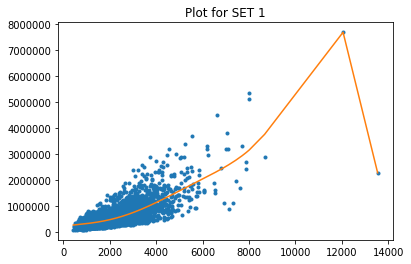

In [89]:
plt.plot(set1_data['power_1'], set1_data['price'], '.',
         set1_data['power_1'], model_1.predict(set1_data), '-')
plt.title('Plot for SET 1')
plt.show()

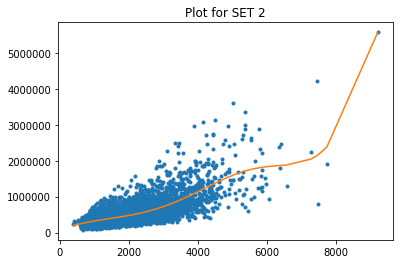

In [90]:
plt.plot(set2_data['power_1'], set2_data['price'], '.',
         set2_data['power_1'], model_2.predict(set2_data), '-')
plt.title('Plot for SET 2')
plt.show()

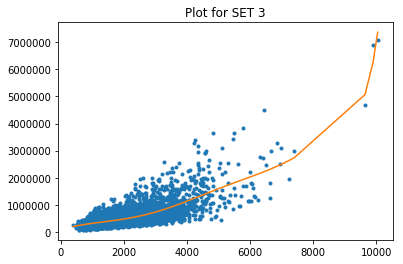

In [91]:
plt.plot(set3_data['power_1'], set3_data['price'], '.',
         set3_data['power_1'], model_3.predict(set3_data), '-')
plt.title('Plot for SET 3')
plt.show()

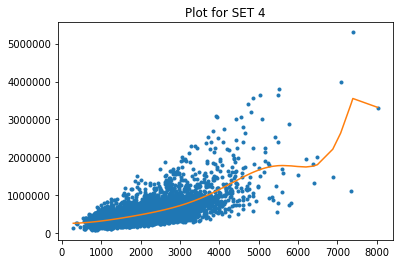

In [92]:
plt.plot(set4_data['power_1'], set4_data['price'], '.',
         set4_data['power_1'], model_4.predict(set4_data), '-')
plt.title('Plot for SET 4')
plt.show()

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set.

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

# Splitting the data into train, validation & test set

In [93]:
train_and_validation, test = sales.random_split(0.9, seed = 1)

train, validation = train_and_validation.random_split(0.5, seed = 1)

Next we should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* We have to check which degree had the lowest RSS on validation data

# Function to draw plots and return RSS values on Validation and Test data

In [153]:
def get_rss_and_plot_graph(train, validation, test, degree):
    
    RSS = {}
    train_data, valid_data, test_data = train['sqft_living'], validation['sqft_living'], test['sqft_living']
    
    for deg in range(1, degree+1):
        
        data = polynomial_sframe(train_data, deg)
        my_features = data.column_names()
        data['price'] = train['price']
        
        model = graphlab.linear_regression.create(data, target = 'price', features = my_features, validation_set = None, verbose = False)

        data = polynomial_sframe(valid_data, deg)
        data['price'] = validation['price']
        predictions = model.predict(data)
        
        rss = get_residual_sum_of_squares(predictions, validation['price'])
        RSS[deg] = rss
        
        plt.plot(data['power_1'], data['price'], '.',
                 data['power_1'], model.predict(data), '-')
        plt.title('Plot for Model '+str(deg))
        plt.show()
        
        data = polynomial_sframe(test_data, deg)
        data['price'] = test['price']
        predictions = model.predict(data)
        test_rss = get_residual_sum_of_squares(predictions, data['price'])

        print('RSS on validation data is: '+str(rss))
        print('RSS on test data is: '+str(test_rss))
        print('\n\n')

    return RSS

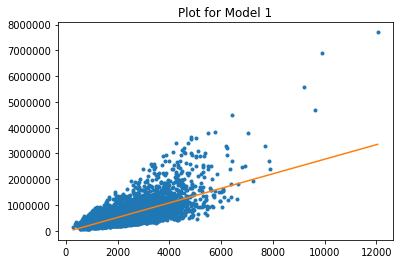

RSS on validation data is: 676709775198047.5
RSS on test data is: 129030470094700.22





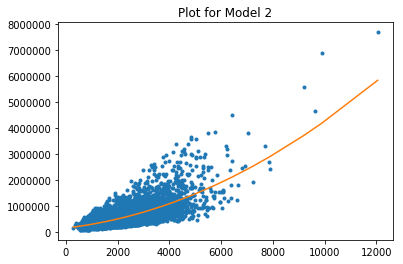

RSS on validation data is: 607090530698014.0
RSS on test data is: 125190117212860.03





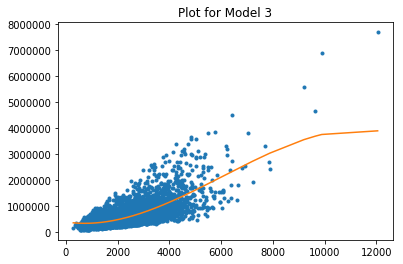

RSS on validation data is: 616714574532763.6
RSS on test data is: 125939457007407.38





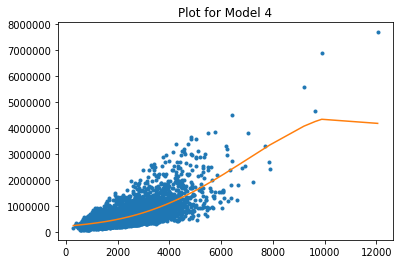

RSS on validation data is: 609129230654381.5
RSS on test data is: 127147719016435.47





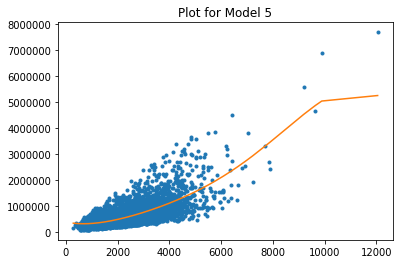

RSS on validation data is: 599177138583640.0
RSS on test data is: 127037730210194.4





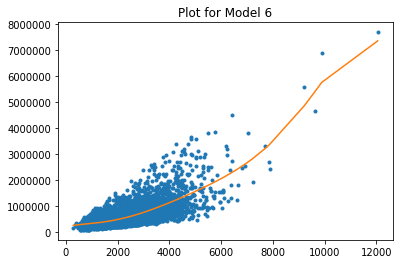

RSS on validation data is: 589182477809728.8
RSS on test data is: 125529337848153.56





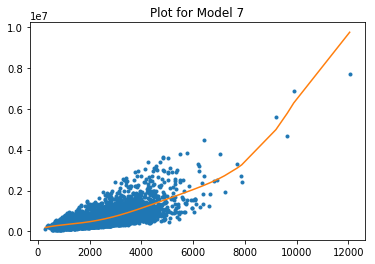

RSS on validation data is: 591717038418246.2
RSS on test data is: 124608773610098.66





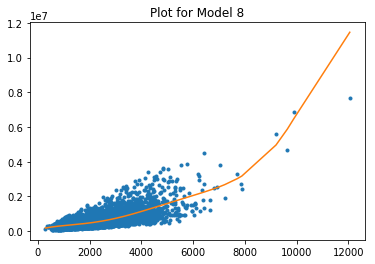

RSS on validation data is: 601558237778495.8
RSS on test data is: 124458964534481.6





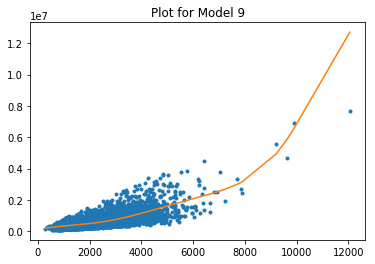

RSS on validation data is: 612563853988056.9
RSS on test data is: 124525299776524.39





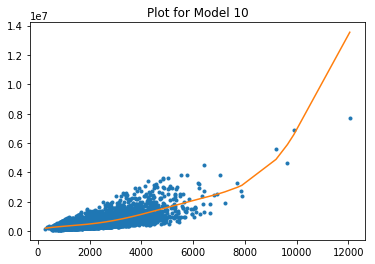

RSS on validation data is: 621744288937675.5
RSS on test data is: 124602928485232.78





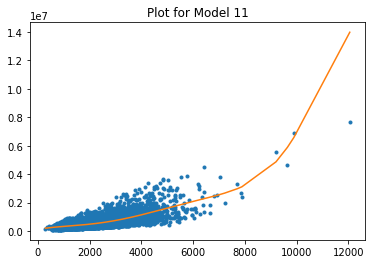

RSS on validation data is: 627012012709087.8
RSS on test data is: 124641733744023.67





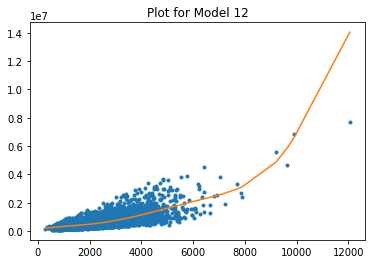

RSS on validation data is: 627757914770984.2
RSS on test data is: 124646108317094.27





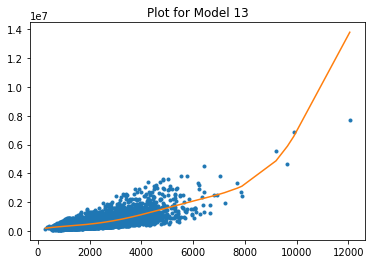

RSS on validation data is: 624738503267779.0
RSS on test data is: 124632209805154.36





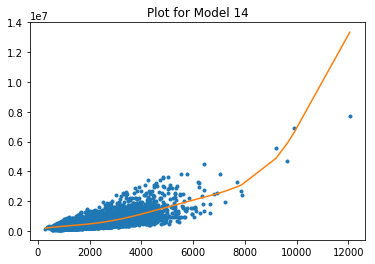

RSS on validation data is: 619369705901976.9
RSS on test data is: 124612578389304.0





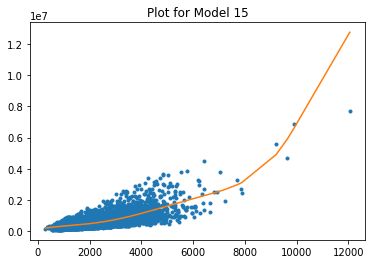

RSS on validation data is: 613089202404340.8
RSS on test data is: 124593903712857.6





In [155]:
RSS = get_rss_and_plot_graph(train, validation, test, 15)

# Finding Minimum RSS

In [160]:
def return_min_rss(RSS):
    
    required_degree, min_rss = -1, max(RSS.values())
    for degree, rss in RSS.items():
        if rss < min_rss:
            required_degree, min_rss = degree, rss
    
    return required_degree, min_rss

In [163]:
degree, rss = return_min_rss(RSS)
print('Best polynomial degree found is '+str(degree)+' with RSS values '+str(rss/10**14))

Best polynomial degree found is 6 with RSS values 5.891824778097288


# Good Luck !!!